Assumptions: All instances in the dataset are required to pay property tax annually, so zero amount paid in any year indicates non-compliant

In [1]:
import pandas as pd

# alternatively df = pd.read_csv("PIERI_20355_main_database.csv")
df = pd.read_csv("https://raw.githubusercontent.com/JinL-Zhang/2023_Fall_Deep_Learning_and_NLP/main/Tax_Compliance_Experiment_with_SMS_Message/PIERI_20355_main_database.csv")

# drop out unncessary columns
df.drop(['Unnamed: 0','data'], inplace=True,axis=1)
df

,mjumbe_id,amountpaid18_19,pay18_19,outstanding19_20,amountpaid19_20,pay19_20,paydate20_21,amountpaid20_21,pay20_21,before_deadline18_19,...,t3,payafter_wave,sms_status_r1,sms_status_r2,sms_status_r3,sms_status_r4,mjcall_status_r1,mjcall_status_r2,received_sms,nu_received_sms
0,2,0.0,0,41030.00,0.0,0,NaN,0.0,0,0,...,1,NaN,Delivered,Delivered,Delivered,Delivered,Not Reached,Not Reached,"Yes, any",4
1,2,0.0,0,35000.00,0.0,0,NaN,0.0,0,0,...,1,NaN,Not delivered,Delivered,Delivered,Delivered,Not Reached,Not Reached,"Yes, any",3
2,2,0.0,0,54137.00,0.0,0,NaN,0.0,0,0,...,1,NaN,Delivered,Delivered,Delivered,Delivered,Not Reached,Not Reached,"Yes, any",4
3,6,0.0,0,45243.08,0.0,0,NaN,0.0,0,0,...,1,NaN,Not delivered,Not delivered,Not delivered,Not delivered,Reached,Reached,"No, not even one",0
4,6,0.0,0,NaN,20000.0,1,NaN,0.0,0,0,...,1,NaN,Delivered,Delivered,Delivered,Delivered,Reached,Reached,"Yes, any",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21323,670,0.0,0,61193.14,0.0,0,NaN,0.0,0,0,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0
21324,670,0.0,0,30477.27,0.0,0,NaN,0.0,0,0,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0
21325,670,0.0,0,10000.00,0.0,0,NaN,0.0,0,0,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0
21326,670,0.0,0,10000.00,0.0,0,NaN,0.0,0,0,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0


# EDA



In [2]:
df.describe()

,mjumbe_id,amountpaid18_19,pay18_19,outstanding19_20,amountpaid19_20,pay19_20,amountpaid20_21,pay20_21,before_deadline18_19,mjumbe_size,treatment_group,t1,t2,t3,nu_received_sms
count,21328.000000,2.132800e+04,21328.000000,1.411300e+04,2.132800e+04,21328.000000,21328.000000,21328.000000,21328.000000,21328.000000,21328.000000,21328.000000,21328.000000,21328.000000,21328.000000
mean,341.105776,4.147362e+03,0.245358,3.493846e+04,2.329707e+03,0.102963,1879.452738,0.095883,0.232371,92.594852,1.489169,0.267067,0.234996,0.250703,2.283290
std,186.625531,1.878590e+04,0.430309,2.735472e+05,1.617748e+04,0.303918,10804.214334,0.294438,0.422354,82.245394,1.116161,0.442438,0.424006,0.433428,1.810349
min,1.000000,0.000000e+00,0.000000,-2.200000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,0.000000e+00,0.000000,1.000000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,334.000000,0.000000e+00,0.000000,2.000000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,502.000000,0.000000e+00,0.000000,3.047727e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,119.000000,3.000000,1.000000,0.000000,1.000000,4.000000
max,670.000000,1.553440e+06,1.000000,2.201225e+07,1.264250e+06,1.000000,516767.062500,1.000000,1.000000,330.000000,3.000000,1.000000,1.000000,1.000000,4.000000


<ipython-input-3-166eccac07ed>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['pay18_19', 'pay19_20', 'pay20_21'], rotation=45)   # Rotate x-axis labels if needed
<ipython-input-3-166eccac07ed>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['pay18_19', 'pay19_20', 'pay20_21'], rotation=45)   # Rotate x-axis labels if needed


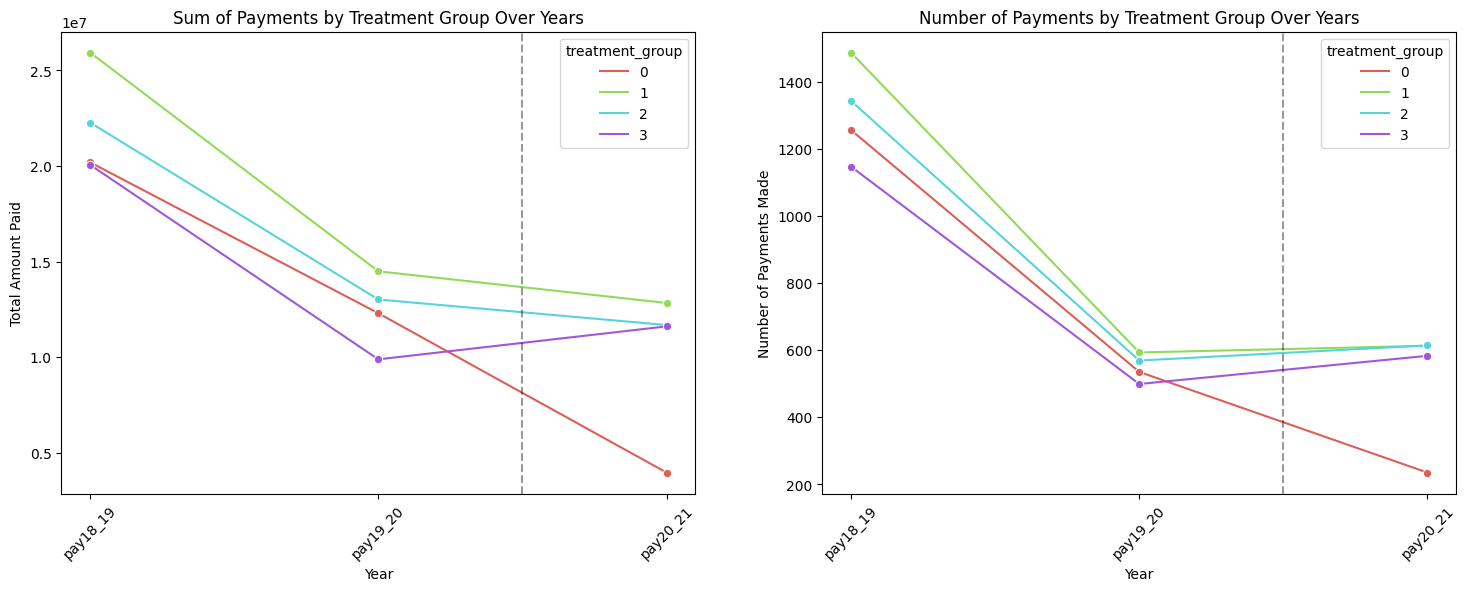

In [3]:
# Plot the Payments made by taxpayer based on the time
import seaborn as sns
import matplotlib.pyplot as plt
long_df = df.melt(id_vars=['treatment_group'],
                  value_vars=['amountpaid18_19', 'amountpaid19_20', 'amountpaid20_21'],
                  var_name='year', value_name='amount_paid')

# Group by treatment_group and year, then sum up the amount_paid
grouped_df = long_df.groupby(['treatment_group', 'year']).sum().reset_index()

# Create the line plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
palette=sns.color_palette("hls",4)
line_plot = sns.lineplot(data=grouped_df, x='year', y='amount_paid', hue='treatment_group', marker='o',palette=palette, ax=axes[0])

# Get the x-axis category labels
x_labels = line_plot.get_xticklabels()

# Find the index of 'amountpaid19_20' and 'amountpaid20_21'
index_1920 = [i for i, label in enumerate(x_labels) if label.get_text() == 'amountpaid19_20'][0]
index_2021 = [i for i, label in enumerate(x_labels) if label.get_text() == 'amountpaid20_21'][0]

# Calculate the midpoint for the vertical line
midpoint = (index_1920 + index_2021) / 2

# Adding a vertical line at the midpoint
axes[0].axvline(x=midpoint, color='black', alpha=.4,linestyle='--')

# Setting titles and labels
axes[0].set_title('Sum of Payments by Treatment Group Over Years')
axes[0].set_ylabel('Total Amount Paid')
axes[0].set_xlabel('Year')
axes[0].set_xticklabels(['pay18_19', 'pay19_20', 'pay20_21'], rotation=45)   # Rotate x-axis labels if needed


# Plot the number of payment made based on time
long_df = df.melt(id_vars=['treatment_group'],
                  value_vars=['pay18_19', 'pay19_20', 'pay20_21'],
                  var_name='year', value_name='amount_paid')

# Group by treatment_group and year, then sum up the amount_paid
grouped_df = long_df.groupby(['treatment_group', 'year']).sum().reset_index()

line_plot = sns.lineplot(data=grouped_df, x='year', y='amount_paid', hue='treatment_group', marker='o',palette=palette, ax=axes[1])
# Adding a vertical line at the midpoint
axes[1].axvline(x=midpoint, color='black', alpha=.4,linestyle='--')

# Setting titles and labels
axes[1].set_title('Number of Payments by Treatment Group Over Years')
axes[1].set_ylabel('Number of Payments Made')
axes[1].set_xlabel('Year')
axes[1].set_xticklabels(['pay18_19', 'pay19_20', 'pay20_21'], rotation=45)   # Rotate x-axis labels if needed
plt.show()

According to the 2 lineplots of the amount of and the number of tax payments made based on the given time period, it can be observed visually that the treatments have promoted the tax complicance behaviour significantly. As shown by the amount of tax paid graph, the amount of tax paid has a downward linear trend (indicated by the control group line), which is significantly alleviated by the three treatments. The treatment group 1 and 2 illustrated a similar alleviated decreasing trend, while the treatment group 3 has reversed the downward trend into upward, which indirectly implies the possible social pressures the local leaders can create to further facilitate the tax complicane.

As for the number of tax payment made graph, while there is still a downward linear trend, all the 3 treatment groups have shown a upward trend in the number of people complied to the property tax, which signify the effect of the overall SMS message on the tax compliance behaviour.  

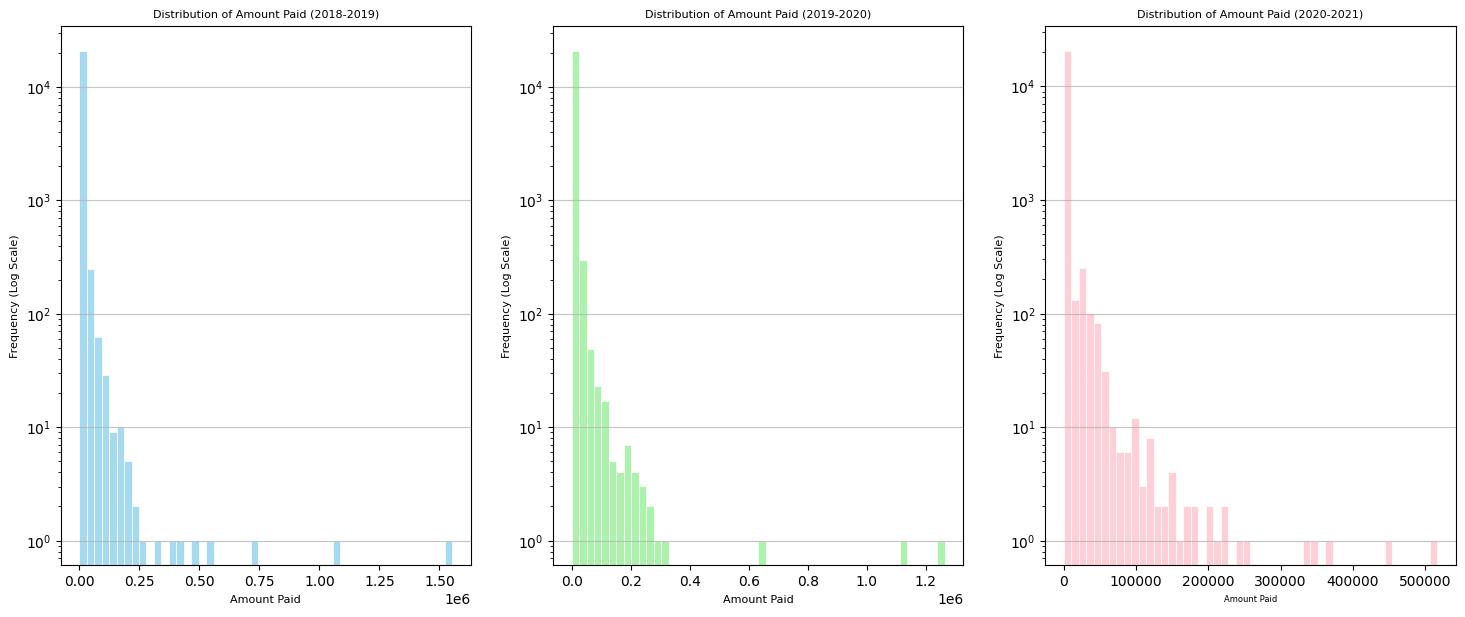

<Figure size 640x480 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Redrawing the combined distribution plots using seaborn

fig, axes = plt.subplots(1, 3, figsize=(18, 7))
sns.set_theme(style="whitegrid")

# Distribution of 'amountpaid18_19'
sns.histplot(x = 'amountpaid18_19',data=df,bins=50, kde=False, color="skyblue", log_scale=(False, True), ax=axes[0])
axes[0].set_title('Distribution of Amount Paid (2018-2019)', fontsize=8)
axes[0].set_xlabel('Amount Paid', fontsize=8)
axes[0].set_ylabel('Frequency (Log Scale)', fontsize=8)
axes[0].grid(axis='y', alpha=0.75)

# Distribution of 'amountpaid19_20'
sns.histplot(x='amountpaid19_20', data=df, bins=50, kde=False, color="lightgreen", log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribution of Amount Paid (2019-2020)', fontsize=8)
axes[1].set_xlabel('Amount Paid', fontsize=8)
axes[1].set_ylabel('Frequency (Log Scale)', fontsize=8)
axes[1].grid(axis='y', alpha=0.75)

# Since the data is heavily skewed, using a log scale for the y-axis
sns.histplot(x='amountpaid20_21', data=df,bins=50, kde=False, color="pink", log_scale=(False, True), ax=axes[2])
plt.title('Distribution of Amount Paid (2020-2021)', fontsize=8)
plt.xlabel('Amount Paid', fontsize=6)
plt.ylabel('Frequency (Log Scale)', fontsize=8)
plt.grid(axis='y', alpha=0.75)

plt.show()
plt.subplots_adjust(wspace=0.3)
plt.show()

The distribution of payment amounts for the fiscal year 2018-2019 is depicted by the blue histogram, where a dominant presence of taller bars on the left suggests a higher frequency of lower payment amounts. A pronounced long-tail distribution indicates that there are relatively few instances of higher amount payments (for example, the number of people who paid more than 500000 for the tax property is less than 10). For the 2019-2020 fiscal year, the green histogram shows a similar pattern of concentration in lower payment amounts, but with a decrease in the occurrence of higher payments compared to the previous year (the number of people who paid more than 500000 for the tax property is less than 5). The pink histogram for the fiscal year 2020-2021 further confirms this trend, with most payments concentrated at the lower end and a complete absence in the higher amont payments. The reduction in the number of high amount payments in 2020-2021 could potentially be due to individual circumstances such as bankrupt (as those people are likely to have multiple properties to be required to make high amount payments, and the bankrupt allowed them to delay or remove this duty) or macro-economic reasons such as COVID-19 (which partially explains the downward trend in the amount of tax payment).

Overall, the 3 histograms are right-skewed, and many people are not complying to the property tax as they make 0 tax payment, while there are some instances of larger payments, which are exceptions rather than the norm.

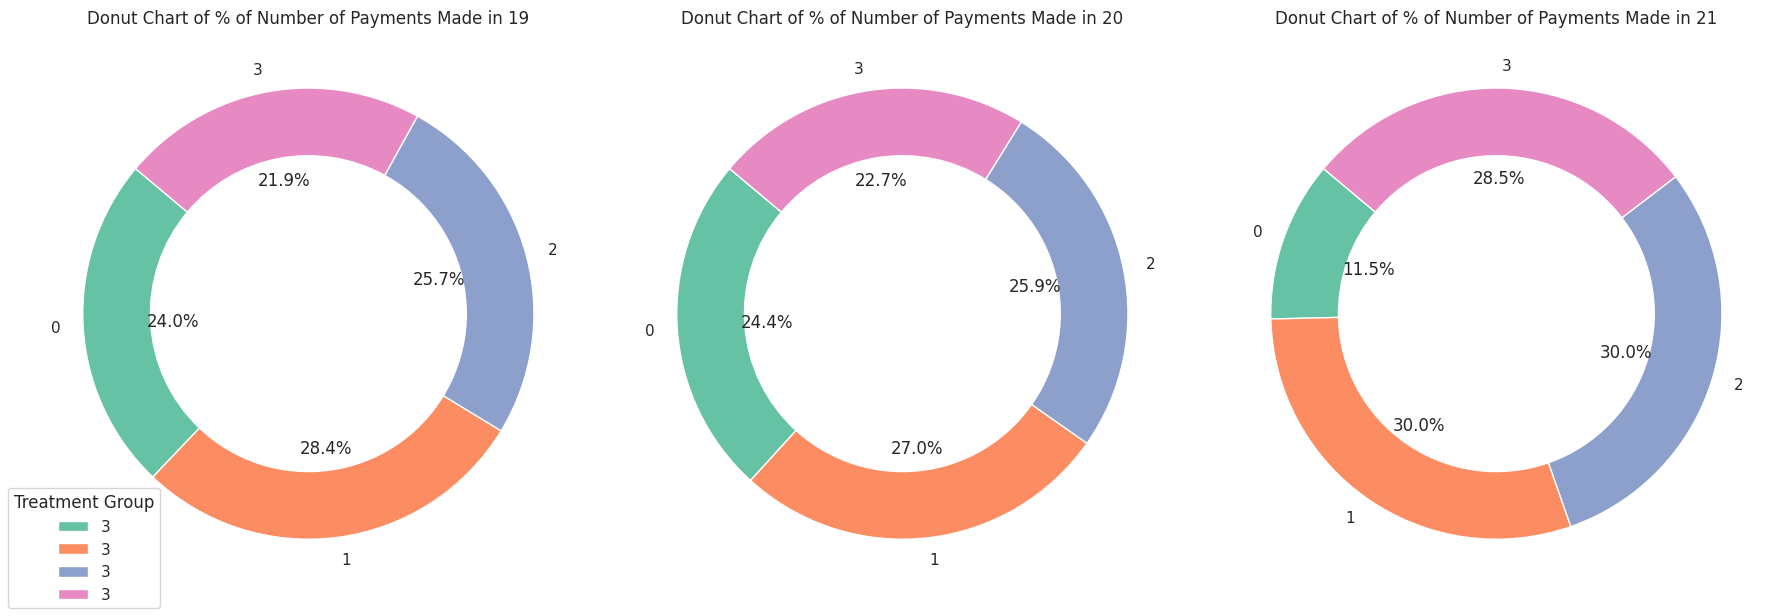

In [5]:
long_format_df_pay = df.melt(id_vars='treatment_group',
                             value_vars=['pay18_19', 'pay19_20', 'pay20_21'],
                             var_name='year', value_name='pay')

# Group by treatment_group and year, then calculate the sum of 'pay'
grouped_df_pay_sum = long_format_df_pay.groupby(['treatment_group', 'year']).sum().reset_index()

# Calculate the total 'pay' per year (regardless of treatment group)
total_pay_per_year = grouped_df_pay_sum.groupby('year')['pay'].sum().reset_index()

# Merge the total pay per year with the grouped data
merged_df_pay = pd.merge(grouped_df_pay_sum, total_pay_per_year, on='year', suffixes=('', '_total'))

# Calculate the percentage of pay per treatment group per year
merged_df_pay['percentage'] = (merged_df_pay['pay'] / merged_df_pay['pay_total']) * 100


# Extracting unique years
years = merged_df_pay['year'].unique()

# Adjusting the color palette for the donut charts
palette = sns.color_palette("Set2")

# Plotting a donut chart for each year with the new color palette
fig, axes = plt.subplots(1, len(years), figsize=(18, 6))

# Capturing the pie objects for the legend
pies = []

for i, year in enumerate(years):
    year_data = merged_df_pay[merged_df_pay['year'] == year]
    pie = axes[i].pie(year_data['percentage'], labels=year_data['treatment_group'],
                      autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), colors=palette)
    pies.append(pie)
    axes[i].set_title(f'Donut Chart of % of Number of Payments Made in {year[-2:]}')

# Creating a legend from the pie objects
fig.legend(pies[0][0], long_format_df_pay['treatment_group'], title='Treatment Group', loc='lower left')
plt.tight_layout()
plt.show()

As shown above, it can be observed that the percentage distributions of the number of payments made by each treatment group are largely similar between 2018 to 2019 and 2019 to 2020, because the natural shift in the percentage distributions for each treatment group are less than 2%, indicating that the behavioral trends were consistent before receiving the intervention (natural trend is negligible). This consistency may be consistent with the parallel trend hypothesis in time series analysis, which states that in the absence of the intervention, the behaviors of the groups would have remained on a similar trend.

Moreover, circular plots are able to express each individual treatment effect better than the line plots. Since after the intervention, we were able to clearly find that the percentage of each group that received the treatment was significantly increased from the previous percentage (only the percentage of the control group drops). This implies that the overall SMS message intervention had a real effect in tax compliance, as there is almost 4% improvement for the treatment group 2, 3% for treatment group 1, and round 6%  for the treatment group 3. Since the improvement is highest for the treatment 3, we can re-affirm our assumption of the impacts of the social pressures the local leaders create.

count    668.000000
mean      34.064371
std       44.600177
min        1.000000
25%        5.000000
50%       21.000000
75%       45.000000
max      330.000000
Name: mjumbe_size, dtype: float64


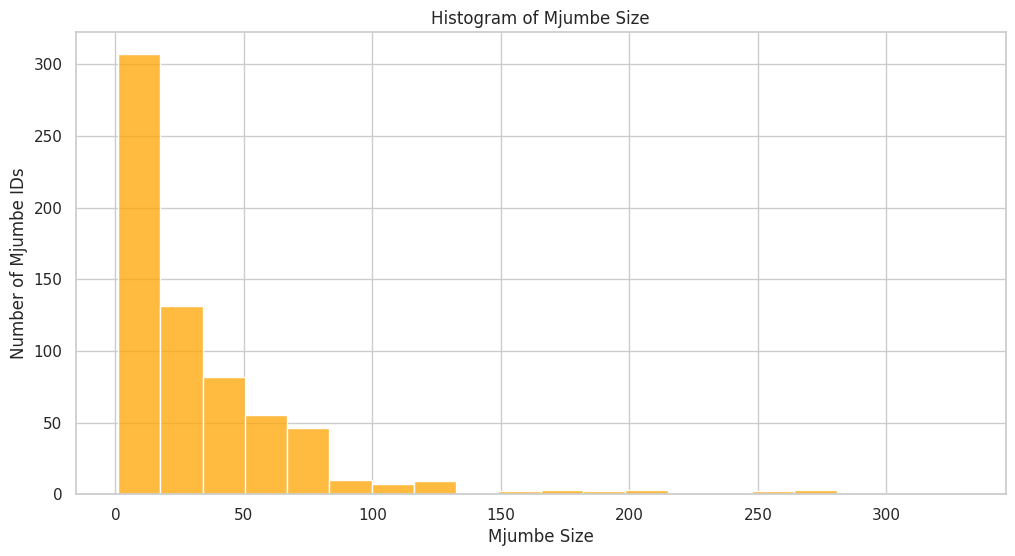

In [6]:
# Creating a histogram for mjumbe_size
grouped_data = df.groupby('mjumbe_id').agg(
    mjumbe_size=('mjumbe_size', 'mean'),  # assuming mjumbe_size is constant for each mjumbe_id
    pay18_19_sum=('pay18_19', 'sum'),
    pay19_20_sum=('pay19_20', 'sum'),
    pay20_21_sum=('pay20_21', 'sum'),
    count=('mjumbe_id', 'size') # number of instances of people under the mjumbe_id
).reset_index()

print(grouped_data['mjumbe_size'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(grouped_data['mjumbe_size'], bins=20,color='orange', kde=False)
plt.title('Histogram of Mjumbe Size')
plt.xlabel('Mjumbe Size')
plt.ylabel('Number of Mjumbe IDs')
plt.show()

As observed above, the distribution of the number of people Mjumbe (local leaders) have authority over is right-skewed, where the majority of Mjumbe only have authority over fewer than 50 people, and a quarter of them only have authority over 5 people. This pattern may suggest that we need to normalize the number of people paid under each Mjumbe by the total number of people under the Mjumbe to reflect the actual influence of a Mjumbe on the tax compliance of the residents. Moreover, we may consider removing the Mjumbe who have authoritry over fewer than 20 people to be more accuratly reflecting the influence or the social pressures a Mjumbe can create. -> May not be need to included in the report



count    668.000000
mean      31.928144
std       42.025097
min        1.000000
25%        5.000000
50%       20.000000
75%       42.000000
max      305.000000
Name: count, dtype: float64


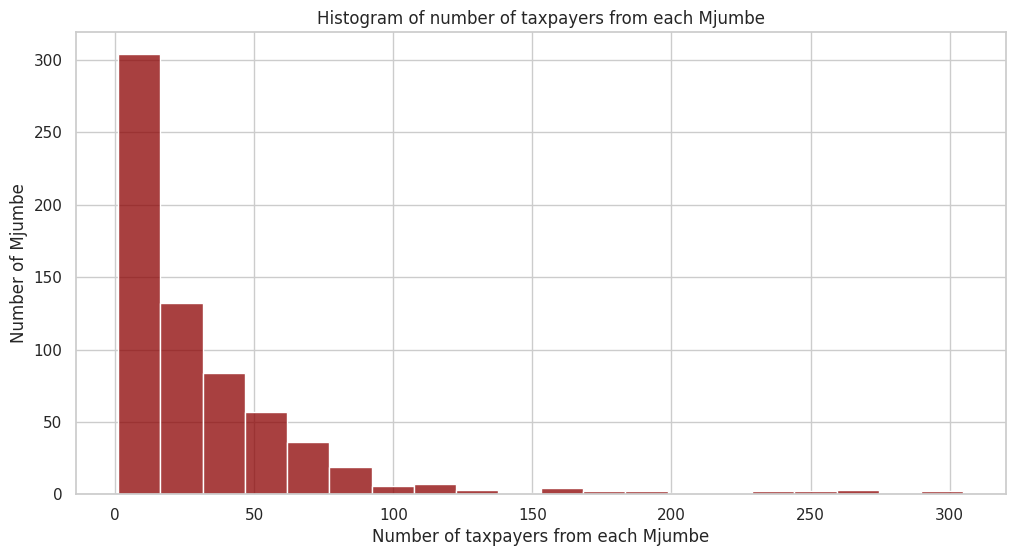

In [7]:
print(grouped_data['count'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(grouped_data['count'], bins=20,color='darkred', kde=False)
plt.title('Histogram of number of taxpayers from each Mjumbe')
plt.xlabel('Number of taxpayers from each Mjumbe')
plt.ylabel('Number of Mjumbe')
plt.show()

As shown above, this histogram illustrates the number of taxpayers from each Mjumbe captured by the experimental dataset. It is clear that this histogram displayed a nearly identical distribution pattern with the Mjumbe size histogram, implying that the data sampling strategy is robust as it aligns with the Mjumbe size (the more people the Mjumbe has authority over, the more samples are collected from that Mjumbe). In other words, the data is unbiased as it reflects the Mjumbe size, and the tax compliance behaviours within each Mjumbe's administrative area is well-represented by the experimental data. As a result, when assessing a Mjumbe's influence, the robust randomized sampling method enables the generalization of the conclusion of 'who is the most influencial Mjumbe regarding tax compliance' in the experimental data to the entire population.


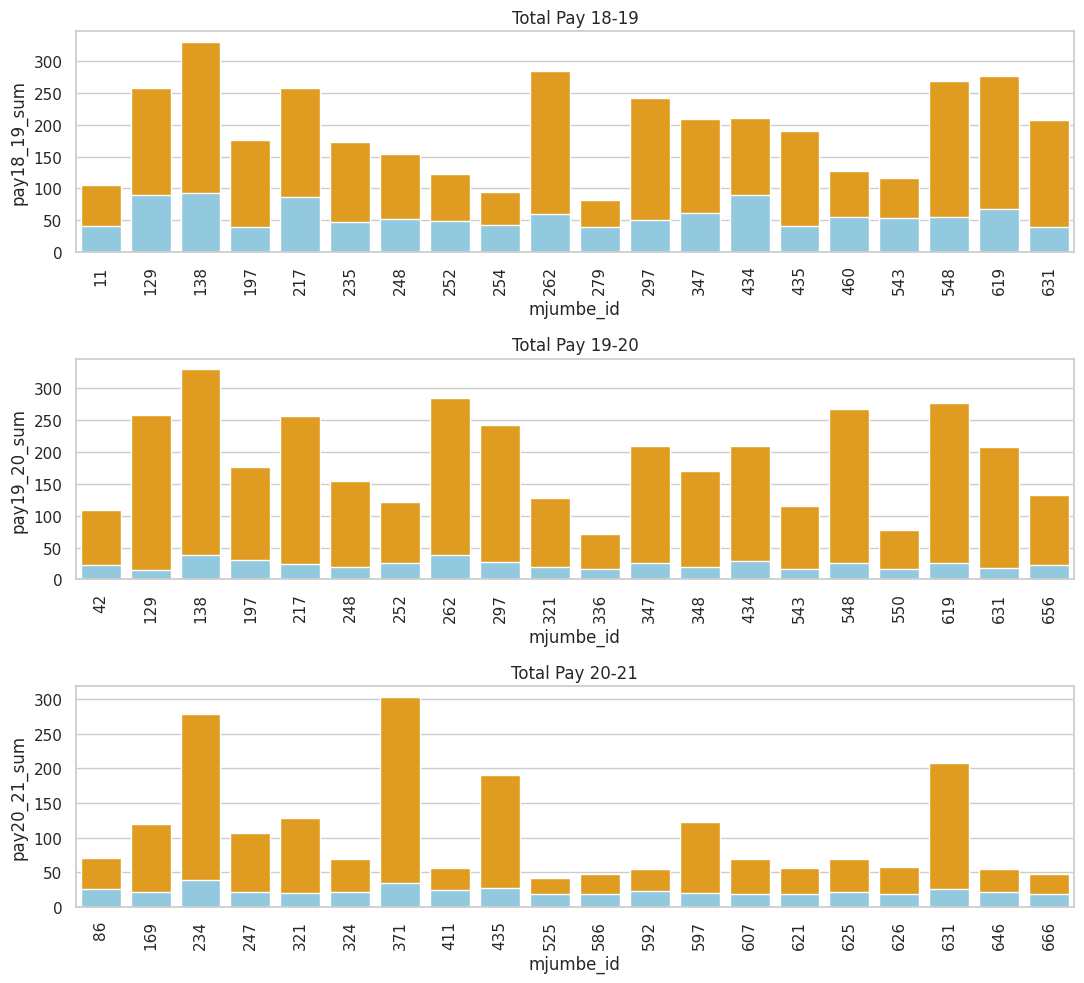

In [8]:
# Visualize the Top 20 mjumbe_ids with the highest number of people paid in each year
top_n = 20

# Creating the visualization
plt.figure(figsize=(11, 10))

plt.subplot(3, 1, 1)
top_mjumbes = grouped_data.nlargest(top_n, 'pay18_19_sum')
sns.barplot(x=top_mjumbes['mjumbe_id'], y=top_mjumbes['mjumbe_size'], color='orange', label='Total Pay 18-19')
sns.barplot(x=top_mjumbes['mjumbe_id'], y=top_mjumbes['pay18_19_sum'], color='skyblue', label='Mjumbe Size')
plt.title('Total Pay 18-19')
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
top_mjumbes = grouped_data.nlargest(top_n, 'pay19_20_sum')
sns.barplot(x=top_mjumbes['mjumbe_id'], y=top_mjumbes['mjumbe_size'], color='orange', label='Total Pay 19-20')
sns.barplot(x=top_mjumbes['mjumbe_id'], y=top_mjumbes['pay19_20_sum'], color='skyblue', label='Mjumbe Size')
plt.title('Total Pay 19-20')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
top_mjumbes = grouped_data.nlargest(top_n, 'pay20_21_sum')
sns.barplot(x=top_mjumbes['mjumbe_id'], y=top_mjumbes['mjumbe_size'], color='orange', label='Total Pay 20-21')
sns.barplot(x=top_mjumbes['mjumbe_id'], y=top_mjumbes['pay20_21_sum'], color='skyblue', label='Mjumbe Size')
plt.title('Total Pay 20-21')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


The 3 graphs indicate the IDs of the top 20 mjumbes with the highest number of taxpayers paid in each year and the corresponding size of the mjumbe (the number of people the mjumbe has authority over). Before the treatment year, the top 20 mjumbes are relatively consistent (for example, big mjumbes like 129, 138, and 262 are all on the top 20 paying list). However, the top 20 mjumbes are changed significantly after the treatment. A profound discovery is that more small mjumbes (with size less than 100 people) have entered into the top 20 paying list, indicating that the SMS message treatments have substantially promoted tax compliance in small mjumbes' administrative areas in despite of the overall decreasing trend in the amount of tax collection from 2019 to 2021. This may suggest that certain analysis can be conducted on samll mjumbes to assess which treatment is more effective regarding tax compliance.

Moreover, large mjumbes like 371 (with size around 300) who have nenver been in the top 20 paying list before the treatment year may also suggest the strong SMS message influences on the taxpayers under the large mjumbes too, which should be investigated further as well. Lastly, another counterintuitive insight gained is that, for the top 20 mjumbes in the treatment year, the number of taxpayers paid is relatively similar across different mjumbes with different sizes, which may suggest that the number of payments made is uncorrelated with the number of taxpayers under the mjumbes once the SMS message is deployed. However, this conclusion is not robustly verified as shown in the below correlation matrix, where the correlation between 'mjumbe_size' and 'pay20_21_sum' is moderately strong (0.54), but the treatment has undoubtedly reduced the correlation between the 'mjumbe_size' and the number of payments made, which may indirectly prove the real impacts of the treatment in the tax compliance of taxpayers under small mjumbes.

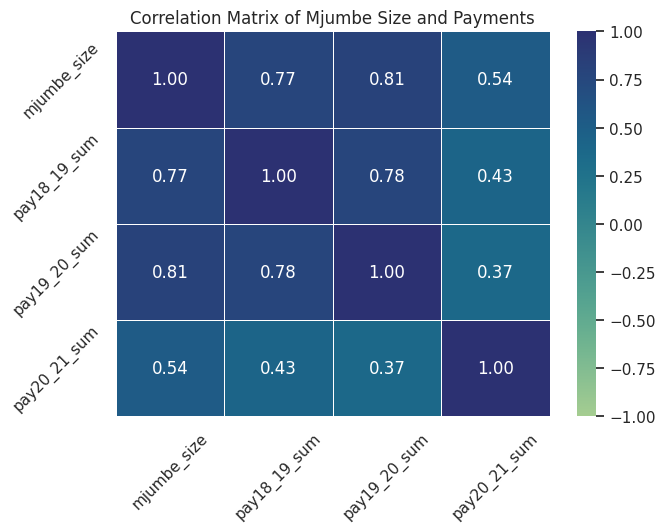

In [9]:
# visualize a correlation matrix
corr = grouped_data[['mjumbe_size', 'pay18_19_sum','pay19_20_sum','pay20_21_sum']].corr()
# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Generate a heatmap with a chosen color palette
sns.heatmap(corr, annot=True, fmt=".2f", cmap='crest', vmin=-1, vmax=1, linewidths=.5)

# Adding titles and labels
plt.title('Correlation Matrix of Mjumbe Size and Payments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability

# Show the plot
plt.show()

In [10]:
data_overview = df.describe(include='all')

missing_values = df.isnull().sum()

data_overview, missing_values

(           mjumbe_id  amountpaid18_19      pay18_19  outstanding19_20  \
 count   21328.000000     2.132800e+04  21328.000000      1.411300e+04   
 unique           NaN              NaN           NaN               NaN   
 top              NaN              NaN           NaN               NaN   
 freq             NaN              NaN           NaN               NaN   
 mean      341.105776     4.147362e+03      0.245358      3.493846e+04   
 std       186.625531     1.878590e+04      0.430309      2.735472e+05   
 min         1.000000     0.000000e+00      0.000000     -2.200000e+04   
 25%       195.000000     0.000000e+00      0.000000      1.000000e+04   
 50%       334.000000     0.000000e+00      0.000000      2.000000e+04   
 75%       502.000000     0.000000e+00      0.000000      3.047727e+04   
 max       670.000000     1.553440e+06      1.000000      2.201225e+07   
 
         amountpaid19_20      pay19_20 paydate20_21  amountpaid20_21  \
 count      2.132800e+04  21328.000000

The dataset reveals significant insights about payment behaviors, especially in the columns amountpaid18_19, amountpaid19_20, and amountpaid20_21, which contain a high number of zero values. This indicates a lack of payments in these respective years as all the residents are expected to pay the property tax annually. Additionally, the outstanding19_20 column shows negative values, suggesting instances of overpayment or adjustments. However, the data's reliability is impacted by the substantial missing values in specific columns such as outstanding19_20, paydate20_21, payafter_wave, and mjcall_status_r1 and mjcall_status_r2. Addressing these gaps through data preprocessing or selection methods is crucial for accurate analysis.

A profound observation in this dataset is the marked decline in the mean values of the payment indicators (pay18_19, pay19_20, pay20_21), which sharply dropped from 0.24 in 2018-19 to 0.10 in 2019-20, and then to 0.09 in 2020-21. Given these indicators are binary, representing whether a payment was made, this trend suggests a substantial decrease in the number of people making payments, which is likely caused by the economic recession due to the COVID-19 pandemic.


# Meta-Description of the experimental dataset
The provided dataset contains results from a one-factor factorial experiment with three levels, where the factor (independent variable) is the SMS message, and the levels correspond to the increasing degrees of severity in the consequences communicated through the tax reminder SMS messages for non-compliance.

In addition, the experiment utilized a big-stick randomization method to assign subjects into 3 treatment groups and 1 control group, and "an analysis of the baseline balance was performed on selected variables of the subjects to check the balance of observable sample characteristics before the start of the intervention to ensure that each treatment group was identical to the control group". As a result, selection bias is eliminated in this experiment, leading 'any difference observed after the intervention to be confidently associated with the intervention impact'.

Moreover, with no explicit pretest measurement of the subjects' tax compliance behaviours (as such measurements are passively collected by the country revenue authority), there is no reactive measurement issue, ultimately leading this experiment to achieve the standard of an adequately robust experimental design.


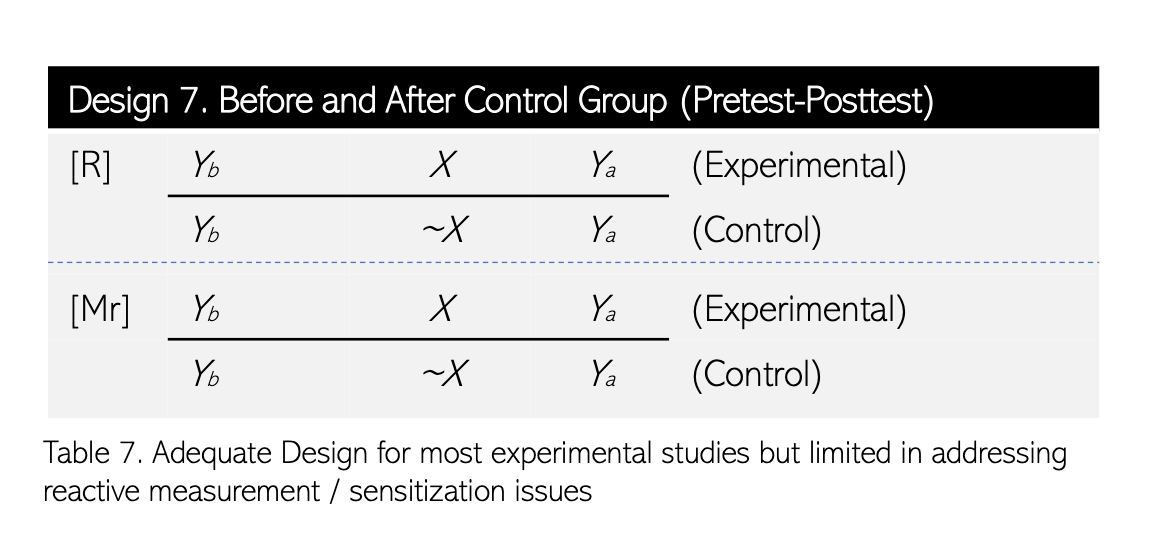

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21328 entries, 0 to 21327
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mjumbe_id             21328 non-null  int64  
 1   amountpaid18_19       21328 non-null  float64
 2   pay18_19              21328 non-null  int64  
 3   outstanding19_20      14113 non-null  float64
 4   amountpaid19_20       21328 non-null  float64
 5   pay19_20              21328 non-null  int64  
 6   paydate20_21          2039 non-null   object 
 7   amountpaid20_21       21328 non-null  float64
 8   pay20_21              21328 non-null  int64  
 9   before_deadline18_19  21328 non-null  int64  
 10  mjumbe_size           21328 non-null  int64  
 11  treatment_group       21328 non-null  int64  
 12  t1                    21328 non-null  int64  
 13  t2                    21328 non-null  int64  
 14  t3                    21328 non-null  int64  
 15  payafter_wave      

### Question 1:
For the subjects in treatment groups who have outstanding tax amount needed to be paid for the fiscal year 2019/2020, but not paying anything before the treatment, we utilize a ANOVA test to assess if the tax compliance behaviour is statistically significantly influenced by one SMS message treatment than the other

In [12]:
from scipy.stats import f_oneway
filter_df = df[ (df['pay19_20'] == 0) & (df['outstanding19_20'] >= 0)]

group1 = filter_df[filter_df['treatment_group'] == 1]['pay20_21']
group2 = filter_df[filter_df['treatment_group'] == 2]['pay20_21']
group3 = filter_df[filter_df['treatment_group'] == 3]['pay20_21']
control_group = filter_df[filter_df['treatment_group'] == 0]['pay20_21']

anova_result = f_oneway(group1,group2,group3,control_group)
anova_p_value = anova_result.pvalue

anova_p_value

7.06960075982802e-10

In [14]:
import scipy.stats as stats

# Define the function to perform a right-tailed t-test
def right_tail_t_test(group1, group2):
    t_stat, p_val_right_tail = stats.ttest_ind(group1, group2,
                                               equal_var=False,
                                               alternative='greater') # assuming unequal variances
    return p_val_right_tail

# Perform t-tests between the treatment group and the control group
test1 = right_tail_t_test(group1, control_group)
test2 = right_tail_t_test(group2, control_group)
test3 = right_tail_t_test(group3, control_group)

print('P-value from right tail t-test between T1 and Control: ',test1)
print('P-value from right tail t-test between T2 and Control: ',test2)
print('P-value from right tail t-test between T3 and Control: ',test3)


P-value from right tail t-test between T1 and Control:  1.3423145511322023e-09
P-value from right tail t-test between T2 and Control:  7.098461034265959e-10
P-value from right tail t-test between T3 and Control:  8.320733097087457e-09


In [15]:
anova_result = f_oneway(group1,group2,group3)
anova_p_value = anova_result.pvalue

anova_p_value

0.8510827021527273

0    0.025627
1    0.052646
2    0.054474
3    0.051406
Name: percentage, dtype: float64


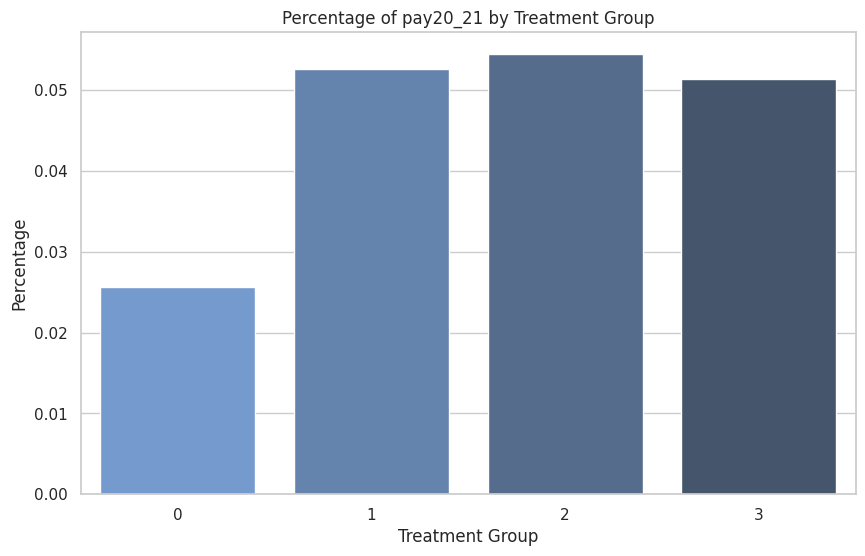

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total amount for each treatment_group
total_amount = filter_df.groupby('treatment_group')['pay20_21'].sum().reset_index()
total_sum = filter_df.groupby('treatment_group')['pay20_21'].count()

# Calculate the percentage for each treatment_group
total_amount['percentage'] = total_amount['pay20_21'] / total_sum
print(total_amount['percentage'])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


# Plot for percentage
plt.figure(figsize=(10, 6))
palette = sns.dark_palette("#69d", reverse=True)
sns.barplot(x='treatment_group', y='percentage', data=total_amount, palette=palette)
plt.title('Percentage of pay20_21 by Treatment Group')
plt.ylabel('Percentage')
plt.xlabel('Treatment Group')
plt.show()



Conclusion: The pay20_21 column represents a dummy variable indicating whether a payment was made in the fiscal year 2020/2021 (In this context, 0 indicates no payment was made, 1 indicates a payment was made). We also filter out the taxpayers who do not 'owe' any property tax (having a clean history of tax compliance) by checking if they have made the payment in the last fiscal year (2019/2020) or not. This filtering enables better identifiction of the treatment effects on the tax compliance as it removes the people who are naturally compliant to the tax policy.

Then, we used an ANOVA test to compare significant differences among three different treatment groups (T1, T2, T3) regarding the behavior of whether the taxpayers made the payments in the treatment year 2020/2021. Specifically, this test aims to answer whether there are significant differences among the given treatments (T1, T2, T3) that affect the likelihood of people making payments in the fiscal year 2020/2021.

Through using ANOVA, we re-confirm the conclusion done by other researchers that the overall SMS message statistically significantly promote the tax compliance behaviours comparing to doing nothing, while the variations in tax compliance due to the three distinct SMS message treatments are not statistically significant as the p-value from the ANOVA between treatment groups is high (namely that the promotions on tax compliance triggered by the 3 different SMS message treatments are not statistically sigificantly different). However, by observing the visualization of the % of people making payments in each treatment group, the group 2 has the highest paying percentage (5.4%), implying more granular t-test between pair of treatment groups may be needed to be conducted




In [17]:

# Perform t-tests
test1 = right_tail_t_test(group2, group1)
test2 = right_tail_t_test(group3, group2)
test3 = right_tail_t_test(group3, group1)

test1, test2, test3


(0.36779794997591975, 0.7137817964531614, 0.5935288534157718)

As indicated by the above p-values of the right-tail t-tests, which are all larger than the significance level 0.05 or 0.1, all null hypothesis (Population Mean of First Group ≤ Population Mean of Second Group) are failed to be rejected, implying that we cannot conclude statistically that Treatment Group 2 has a higher mean number of payments than Treatment Group 1, or Treatment Group 3 has a higher mean number of payments than Treatment Group 2, or Treatment Group 3 has a higher mean number of payments than Treatment Group 1. As a result, the 3 treatments may be considered as the same regarding affecting the number of people complying to the tax. However, as the p-value between the group 2 and the group 1 is the samllest (0.37) comparing to the other 2 p-values, the evidence against the null hypothesis is stronger in the comparison between group 2 and group 1 (H0: mean number of payment of group 2 ≤ mean number of payment of group 1) than in the other 2 comparisons, suggesting further investigation on the treatment effect may be needed




### Question 2:
As observed previously, the number of paying taxpayers under the mjumbe of small size (less than 100 residents) tend to increase after the treatment, which may lead to a question about whether the treatment effects produced by the 3 different treatments may differ for the mjumbe of different sizes. Hence, we want to know which treatment may promote tax compliance more than the others based on the sizes of mjumbe

In [18]:
t3_ids = df[df['t3'] == 1]['mjumbe_id'].unique()
t2_ids = df[df['t2'] == 1]['mjumbe_id'].unique()
t1_ids = df[df['t1'] == 1]['mjumbe_id'].unique()
t0_ids = df[df['treatment_group'] == 0]['mjumbe_id'].unique()

# filter t1, t2, t3
grouped_data['t3'] = grouped_data['mjumbe_id'].apply(lambda x: 1 if x in t3_ids else 0)
grouped_data['t2'] = grouped_data['mjumbe_id'].apply(lambda x: 1 if x in t2_ids else 0)
grouped_data['t1'] = grouped_data['mjumbe_id'].apply(lambda x: 1 if x in t1_ids else 0)
grouped_data['t0'] = grouped_data['mjumbe_id'].apply(lambda x: 1 if x in t0_ids else 0)

small_threshold = 10 #grouped_data['mjumbe_size'].quantile(0.20)
medium_threshold = 35

small_groups = grouped_data[grouped_data['mjumbe_size'] <= small_threshold]
medium_groups = grouped_data[(grouped_data['mjumbe_size'] > small_threshold) & (grouped_data['mjumbe_size'] <= medium_threshold)]
large_groups = grouped_data[grouped_data['mjumbe_size'] > medium_threshold]

print('number of instance in small group: ', len(small_groups))
print('number of instance in medium group size: ', len(medium_groups))
print('number of instance in large group size: ', len(large_groups))


number of instance in small group:  237
number of instance in medium group size:  214
number of instance in large group size:  217


<ipython-input-19-6716cad4baf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_groups['group_size'] = 'Small'
<ipython-input-19-6716cad4baf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_groups['group_size'] = 'Medium'
<ipython-input-19-6716cad4baf0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

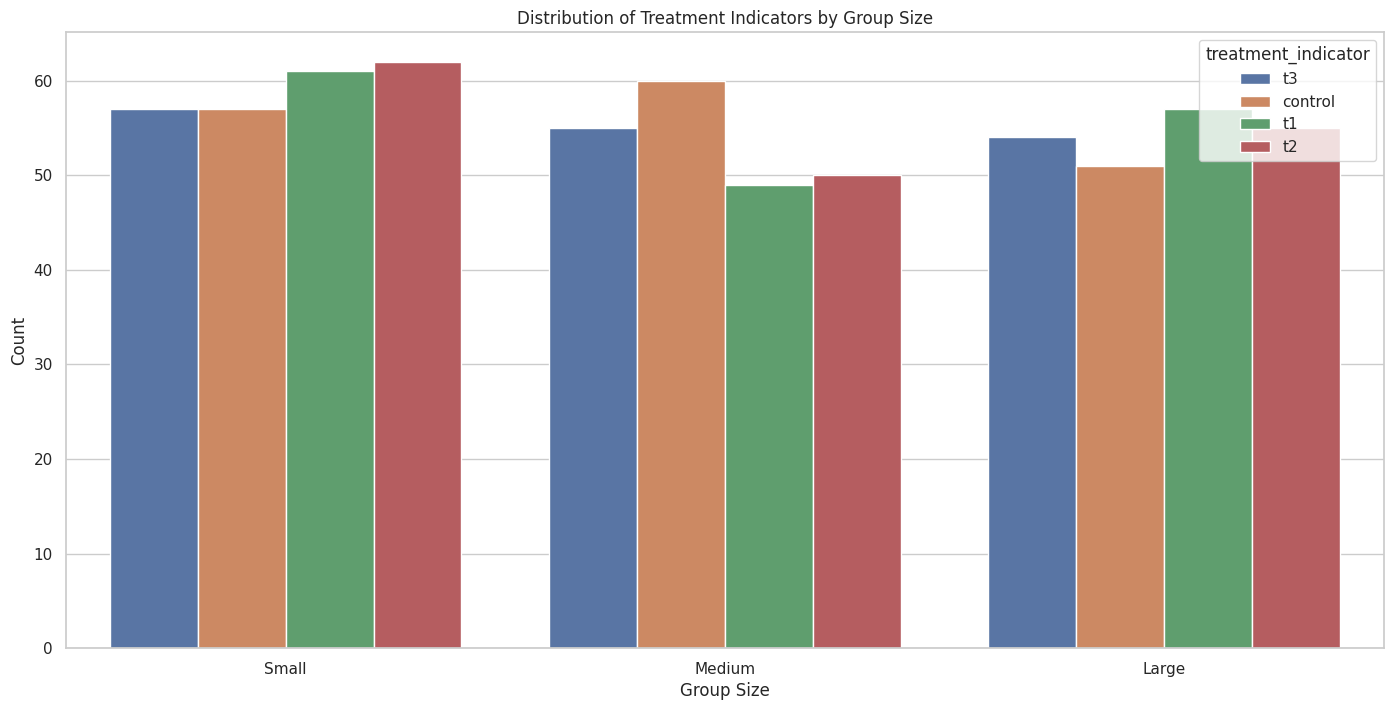

In [19]:
# Label each group
small_groups['group_size'] = 'Small'
medium_groups['group_size'] = 'Medium'
large_groups['group_size'] = 'Large'

# Combine the groups
combined_groups = pd.concat([small_groups, medium_groups, large_groups])

# Function to determine the treatment indicator
def get_treatment_indicator(row):
    if row['t1'] == 1:
        return 't1'
    elif row['t2'] == 1:
        return 't2'
    elif row['t3'] == 1:
        return 't3'
    else:
        return 'control'

# Apply the function to create a new column 'treatment_indicator'
combined_groups['treatment_indicator'] = combined_groups.apply(get_treatment_indicator, axis=1)

plt.figure(figsize=(17, 8))
sns.countplot(x='group_size', hue='treatment_indicator', data=combined_groups)

# Adding titles and labels
plt.title('Distribution of Treatment Indicators by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Count')

# Show the plot
plt.show()

In [20]:
from scipy.stats import f_oneway
import scipy.stats as stats
# Dictionary to hold the ANOVA results
results = {}

# ANOVA for small groups
results['small_treatment_t1_t2_t3'] = round(f_oneway(
    small_groups[small_groups['t1'] == 1]['pay20_21_sum'],
    small_groups[small_groups['t2'] == 1]['pay20_21_sum'],
    small_groups[small_groups['t3'] == 1]['pay20_21_sum']
).pvalue, 2)

t_stat, p_val_t1_t2 = stats.ttest_ind(
    small_groups[small_groups['t1'] == 1]['pay20_21_sum'],
    small_groups[small_groups['t2'] == 1]['pay20_21_sum'],
    equal_var=False,alternative='greater'
)
# Comparing treatment 1 with treatment 2
results['small_treatment_t1_t2_right_tail_t_test'] = round(p_val_t1_t2, 2)

t_stat, p_val_t3_t1 = stats.ttest_ind(
    small_groups[small_groups['t3'] == 1]['pay20_21_sum'],
    small_groups[small_groups['t1'] == 1]['pay20_21_sum'],
    equal_var=False,alternative='greater'
)
# Comparing treatment 3 with treatment 1
results['small_treatment_t3_t1_right_tail_t_test'] = round(p_val_t3_t1, 2)

t_stat, p_val_t3_t2 = stats.ttest_ind(
    small_groups[small_groups['t3'] == 1]['pay20_21_sum'],
    small_groups[small_groups['t2'] == 1]['pay20_21_sum'],
    equal_var=False,alternative='greater'
)
# Comparing treatment 2 with treatment 3
results['small_treatment_t3_t2_right_tail_t_test'] = round(p_val_t3_t2, 2)


# ANOVA for medium groups
results['medium_treatment_t1_t2_t3'] = round(f_oneway(
    medium_groups[medium_groups['t1'] == 1]['pay20_21_sum'],
    medium_groups[medium_groups['t2'] == 1]['pay20_21_sum'],
    medium_groups[medium_groups['t3'] == 1]['pay20_21_sum']
).pvalue, 2)

t_stat, p_val_t1_t2 = stats.ttest_ind(
    medium_groups[medium_groups['t1'] == 1]['pay20_21_sum'],
    medium_groups[medium_groups['t2'] == 1]['pay20_21_sum'],
    equal_var=False,alternative='greater'
)
# Comparing treatment 1 with treatment 2
results['medium_treatment_t1_t2_right_tail_t_test'] = round(p_val_t1_t2, 2)

t_stat, p_val_t1_t3 = stats.ttest_ind(
    medium_groups[medium_groups['t1'] == 1]['pay20_21_sum'],
    medium_groups[medium_groups['t3'] == 1]['pay20_21_sum'],
    equal_var=False,alternative='greater'
)
# Comparing treatment 1 with treatment 3
results['medium_treatment_t1_t3_right_tail_t_test'] = round(p_val_t1_t3, 2)

t_stat, p_val_t2_t3 = stats.ttest_ind(
    medium_groups[medium_groups['t2'] == 1]['pay20_21_sum'],
    medium_groups[medium_groups['t3'] == 1]['pay20_21_sum'],
    equal_var=False,alternative='greater'
)
# Comparing treatment 2 with treatment 3
results['medium_treatment_t2_t3_right_tail_t_test'] = round(p_val_t2_t3, 2)


# ANOVA for large groups
results['large_treatment_t1_t2_t3'] = round(f_oneway(
    large_groups[large_groups['t1'] == 1]['pay20_21_sum'],
    large_groups[large_groups['t2'] == 1]['pay20_21_sum'],
    large_groups[large_groups['t3'] == 1]['pay20_21_sum']
).pvalue, 2)


results

{'small_treatment_t1_t2_t3': 0.31,
 'small_treatment_t1_t2_right_tail_t_test': 0.53,
 'small_treatment_t3_t1_right_tail_t_test': 0.1,
 'small_treatment_t3_t2_right_tail_t_test': 0.1,
 'medium_treatment_t1_t2_t3': 0.29,
 'medium_treatment_t1_t2_right_tail_t_test': 0.39,
 'medium_treatment_t1_t3_right_tail_t_test': 0.07,
 'medium_treatment_t2_t3_right_tail_t_test': 0.11,
 'large_treatment_t1_t2_t3': 0.96}

### Conclusion

Through dividing the mjumbe with size less than 10 into the  small mjumbe group, the mjumbe with size less than 35 but larger than 10 into the medium mjumbe group, and the mjumbe with size larger than 35 into the large mjumbe group, we obtained 3 approximately balanced subgroups based on the mjumbe size. It is noteworthy that the taxpayers under the same mjumbe are sampled to the same treatment group in the dataset, meaning that the people under a mjumbe cannot show in 2 different treatment groups and we cannot observe the treatment effect between taxpayers under the same mjumbe. Also, according to the visualization above, the distributions of treatment group asignment across the 3 different mjumbe_size subgroups are roughly similar, implying that the following discovery should be unbiased and representative of the population.

Through firstly conducting ANOVA test on the treatment groups in each of the 3 mjumbe_size subgroups, we have found out that the p-values are relatively low for the small and medium size mjumbe subgroups (0.31,0.29), while the p-value is extremely high for the large size mjumbe subgroups (0.96). Such high p-value, which is close to 1, indicates that we have strong evidence to believe that the null hypothesis is true, meaning that the differences observed in the number of people paid between the 3 treatment groups in the large size mjumbe subgroup are likely attributable to random variation. **Hence, we firstly can conclude that for the large size mjumbe (more than 35 taxpayers), different SMS message treatments yield the same impact on the tax compliance, and so the revenue agency should choose the most cost-efficient SMS method to maximize the tax collection in those mjumbe administrative areas**

Then, we have completed 2-sample t-test for each pair of treatment groups in the small and medium size mjumbe subgroups to further inspect the treatment effects. As for the small size mjumbe subgroup, the 2 p-values from the right-tail t-tests for (Treatment 1 vs Treatment 3) and (Treatment 2 vs Treatment 3) are very close to 1 (0.9), implying strong support for the null hypothesis. **Thus, we can state that for the small size mjumbe (less than 10 taxpayers), SMS message with actual involvement of the corresponding mjumbe will yield the highest positive impact on the tax compliance, and should always be implemented to maximize the tax collection in those mjumbe administrative areas**

Lastly, for the medium size mjumbe subgroup, a reverse statement to the one from the small size mjumbe subgroup can be established, because the 2 p-values from the right-tail t-tests for (Treatment 1 vs Treatment 3) and (Treatment 2 vs Treatment 3) are very close to the 0.1 significance level (0.7,0.11), implying strong evidence to support the alternative hypothesis, where the number of people paying in Treatment Group 1 and 2 is statistically significantly more than that of people in Treatment Group 3. **Therefore, we can state that for the medium size mjumbe (less than 35 but more than 10 taxpayers), the SMS message with or without the threat of the involvement of the corresponding mjumbe will yield the highest positive impact on the tax compliance, and should avoid the actual involvement of the mjumbe to save the operational cost and to maximize the tax collection in those mjumbe administrative areas** (as the actual involvement of the mjumbe is likely to discourage the tax compliance in the medium size mjumbe area)


Overall, those findings suggest that the group size would have the influence in the number of taxpayers who made the payments, even though this influence would be not easily noticeable in the analysis.


### Question 3:
Based on previous conclusions, we wondering if panel techniques can be applied to produce a robust linear analysis of relationships between the amount of tax paid in each year (dependent variable) and the time-invariant explanatory variables like the 'mjumbe_size' and the 'treatment_group'

In [21]:
# filter out the people who never made a single payment throughout the period
# to reduce the noises in the training data as those people are insensitive to any of the 3 treatments
rows_to_drop = df[(df['amountpaid18_19'] == 0) & (df['amountpaid19_20'] == 0) & (df['amountpaid20_21'] == 0)].index

# Drop these rows
df_drop = df.drop(rows_to_drop, axis=0)
df_drop

,mjumbe_id,amountpaid18_19,pay18_19,outstanding19_20,amountpaid19_20,pay19_20,paydate20_21,amountpaid20_21,pay20_21,before_deadline18_19,...,t3,payafter_wave,sms_status_r1,sms_status_r2,sms_status_r3,sms_status_r4,mjcall_status_r1,mjcall_status_r2,received_sms,nu_received_sms
4,6,0.00,0,NaN,20000.0,1,NaN,0.0,0,0,...,1,NaN,Delivered,Delivered,Delivered,Delivered,Reached,Reached,"Yes, any",4
14,6,10000.00,1,NaN,0.0,0,NaN,0.0,0,1,...,1,NaN,Delivered,Delivered,Delivered,Delivered,Reached,Reached,"Yes, any",4
15,6,35715.89,1,10000.00,0.0,0,NaN,0.0,0,1,...,1,NaN,Delivered,Delivered,Delivered,Not delivered,Reached,Reached,"Yes, any",3
16,6,0.00,0,NaN,10000.0,1,08may2021,10000.0,1,0,...,1,Paid after W1-SMS(3may-23may),Delivered,Delivered,Delivered,Delivered,Reached,Reached,"Yes, any",4
34,6,71431.77,1,NaN,0.0,0,NaN,0.0,0,1,...,1,NaN,Delivered,Delivered,Delivered,Not delivered,Reached,Reached,"Yes, any",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21313,670,10000.00,1,NaN,10000.0,1,NaN,0.0,0,1,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0
21314,670,20000.00,1,NaN,0.0,0,NaN,0.0,0,1,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0
21315,670,0.00,0,30477.27,0.0,0,17sep2020,10000.0,1,0,...,0,Payment made before first SMS wave,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0
21316,670,20000.00,1,NaN,0.0,0,NaN,0.0,0,1,...,0,NaN,Not delivered,Not delivered,Not delivered,Not delivered,NaN,NaN,"Yes, any",0


In [ ]:
# Resetting the index to include it in the melted DataFrame
data_reset_index = df_drop.reset_index()

# Melting the data to create a long format DataFrame, using the reset index as the identifier
long_format_df_with_index = pd.melt(data_reset_index,
                                    id_vars=['index','treatment_group','mjumbe_size'],
                                    value_vars=['amountpaid18_19', 'amountpaid19_20', 'amountpaid20_21'],
                                    var_name='year',
                                    value_name='amount_paid')
# Replacing the column names in the 'year' column to more readable format
year_mapping = {
    'amountpaid18_19': '2018-19',
    'amountpaid19_20': '2019-20',
    'amountpaid20_21': '2020-21'
}
# Mapping the year column to more readable format
long_format_df_with_index['year'] = long_format_df_with_index['year'].map(year_mapping)

# Displaying the first few rows of the transformed DataFrame
long_format_df_with_index.sort_values(['index','year'], inplace=True)
long_format_df_with_index.reset_index(drop=True, inplace=True)
long_format_df_with_index.rename({'index':'id'},axis=1,inplace=True)
long_format_df_with_index

,id,treatment_group,mjumbe_size,year,amount_paid
0,4,3,43,2018-19,0.0
1,4,3,43,2019-20,20000.0
2,4,3,43,2020-21,0.0
3,14,3,43,2018-19,10000.0
4,14,3,43,2019-20,0.0
...,...,...,...,...,...
21538,21316,0,69,2019-20,0.0
21539,21316,0,69,2020-21,0.0
21540,21322,0,69,2018-19,10000.0
21541,21322,0,69,2019-20,0.0


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
# For Random Effects Model
re_model = MixedLM.from_formula('amount_paid ~ treatment_group + year + mjumbe_size',
                                 groups='id', re_formula='~year', data=long_format_df_with_index)
re_result = re_model.fit()
print(re_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                             Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            amount_paid   
No. Observations:              21543              Method:                        REML          
No. Groups:                    7181               Scale:                         304055810.1966
Min. group size:               3                  Log-Likelihood:                -248440.4081  
Max. group size:               3                  Converged:                     Yes           
Mean group size:               3.0                                                             
-----------------------------------------------------------------------------------------------
                                          Coef.      Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------------------------------
Intercept                                  12329.053  462.282  26.670

In [ ]:
# For Fixed Effects Model
fe_model = MixedLM.from_formula('amount_paid ~ treatment_group + year + mjumbe_size',
                                groups='id', data=long_format_df_with_index)
fe_result = fe_model.fit()
print(fe_result.summary())




/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


               Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   amount_paid   
No. Observations:     21543     Method:               REML          
No. Groups:           7181      Scale:                672776285.1080
Min. group size:      3         Log-Likelihood:       -249489.4652  
Max. group size:      3         Converged:            Yes           
Mean group size:      3.0                                           
--------------------------------------------------------------------
                  Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
--------------------------------------------------------------------
Intercept       12779.536  453.075  28.206 0.000 11891.526 13667.546
year[T.2019-20] -5398.543  432.870 -12.471 0.000 -6246.953 -4550.132
year[T.2020-21] -6735.826  432.870 -15.561 0.000 -7584.237 -5887.416
treatment_group   128.711  164.003   0.785 0.433  -192.729   450.152
mjumbe_size        -7.447    2.278  -3.269 0.001  

In [ ]:
import statsmodels.api as sm
import numpy as np

# Perform Hausman Test
# Calculating the covariance matrix of the difference of the estimators
diff = fe_result.params - re_result.params
cov_diff = fe_result.cov_params() - re_result.cov_params()

# Hausman test statistic
hausman_stat = np.dot(np.dot(diff.T, np.linalg.inv(cov_diff)), diff)

# Degrees of freedom
df = len(fe_result.params)

# p-value from chi-squared distribution
p_value = stats.chi2.sf(hausman_stat, df)

print("Hausman Test Statistic:", hausman_stat)
print("Degrees of Freedom:", df)
print("P-value:", p_value)

Hausman Test Statistic: nan
Degrees of Freedom: 6
P-value: nan


### Conclusion
Firstly, we have filtered out the people who have never made a single tax payment throughout the period the dataset captures in order to reduce the computational requirements and the noises in the training data (as those people are insensitive to any of the 3 treatments, adding no insights to our analysis).

Then, after transforming the dataset into the one suitable for the panel analysis (in which each row represents a single year's data for an individual), we trained a RE (Random Effect) model on the transformed dataset as we believe that the individual-specific effects are uncorrelated with the independent variables like 'mjumbe_size' while we want to understand the effect of the variables that vary between individuals such as 'treatment_effect'.

Through observing RE model summary, we know that this RE model has a poor goodness of fit as the 'scale' value is very large, suggesting substantial variability in data that is unexplained by the model, which can be partially attributed to the number of time periods we have (only 3) and the weak relationships between the 'treatment_group' variable and the dependent variable before the treatment year.

However, if assuming the RE model analysis is valid, we can see that the effects of all the explanatory variables are considered signicant to the model predictions as their p-values are all below 0.05. Then, through checking the coefficients of the variables, we can see some of previous conclusions are re-confirmed. For example, both year[T.2019-20] and year[T.2020-21] have negative coefficients, implying decreases in the amount_paid compared to the base year (2018-19). This is consistent with a downward trend in payments over time as we visualized before. Also, the positive coefficient the 'treatment_group' variable associated with indicates that being in the treatment group (treatment_group>0) is associated with an increase in the amount_paid, implying the positive influence SMS messages have on tax compliance.   

Finally, it is noteworthy that we should not train the FE (Fixed Effect) model on the dataset as it cannot estimate the impact of time-invariant variables (these variables are differenced out) like 'treatment_group', and we can assure this statement by attempting the Hausman Test, which failed to give a meaningful result (nan p-value) when we compare the coefficients of the FE and RE models

Note: The decreasing trend in payments over the years may needs to be investigated and addressed, possibly by researching the market trends, customer behaviors, or changing economic conditions.

### Question 4:
We want to know which local leader can promote the tax compliance behaviour more than the other leader. For example, if the % of people paid under one local leader's territory is statistically significantly more than the % of people paid in the other leaders' territories

## We attempted to answer this question but running out of time